### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
## Importin Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR,SVR
import warnings
warnings.filterwarnings('ignore')

import mglearn as mglearn
%matplotlib inline 

In [2]:
### Importing the data 

audit = pd.read_csv('audit_risk.csv')

In [3]:
audit.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [4]:
trial = pd.read_csv('trial.csv')

In [5]:
trial.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [6]:
audit['Money_Value'].fillna(0, inplace = True)

In [7]:
trial['Money_Value'].fillna(0, inplace = True)

In [8]:
print("Audit \n", audit.isnull().sum())
print("Trial \n",trial.isnull().sum())

Audit 
 Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64
Trial 
 Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


In [9]:
audit_risk = pd.merge(audit,trial, left_index=True, right_index=True,how = 'inner',suffixes=('', ' '))

In [10]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                
    return list(duplicateColumnNames)

In [11]:
duplicateColumnNames = getDuplicateColumns(audit_risk)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  TOTAL 
Column name :  PARA_B 
Column name :  LOCATION_ID 
Column name :  Sector_score 
Column name :  PARA_A 
Column name :  numbers 
Column name :  District
Column name :  Money_Value 
Column name :  History 
Column name :  Score 


In [12]:
audit_risk = audit_risk.drop(columns=getDuplicateColumns(audit_risk))

In [13]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 35 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

Converting and imputing values for ``LOCATION_ID`` 

In [14]:
audit_risk['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [15]:
audit_risk.LOCATION_ID.replace(['LOHARU', 'NUH', 'SAFIDON'], ['45', '46', '47'], inplace=True)

In [16]:
audit_risk['LOCATION_ID'] = audit_risk['LOCATION_ID'].astype(np.int64)

In [17]:
audit_risk[:10][['Score_A', 'Score_B', 'SCORE_A', 'SCORE_B']]

,Score_A,Score_B,SCORE_A,SCORE_B
0,0.6,0.2,6,2
1,0.2,0.2,2,2
2,0.2,0.2,2,2
3,0.2,0.6,2,6
4,0.2,0.2,2,2
5,0.2,0.2,2,2
6,0.4,0.4,4,4
7,0.6,0.6,6,6
8,0.6,0.6,6,6
9,0.6,0.2,6,2


As Columns ``Score_A, Score_B`` and ``SCORE_A, SCORE_B`` are similar and related as ``SCORE_* = 10 * Score_*`` So we can drop both ``SCORE_A`` and ``SCORE_B`` columns 

In [18]:
audit_risk = audit_risk.drop(['SCORE_A', 'SCORE_B'], axis = 1)

In [19]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 33 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null int64
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CONT

### Exploratory Data Analysis 

Findging the Risk Distribution in the data on ``Risk`` column as it is one of the target variable

Text(0.5, 1.0, ' Risk of Fraud Ditribution \n (0: Not Risky Firm || 1: Risky Firm)')

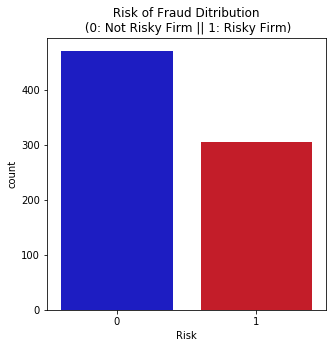

In [20]:
colors = ["#0101DE", "#DF0111"]
fig1 = plt.subplots(figsize = (5,5))
sns.countplot('Risk', data=audit_risk, palette=colors)
plt.title(' Risk of Fraud Ditribution \n (0: Not Risky Firm || 1: Risky Firm)', fontsize=12)

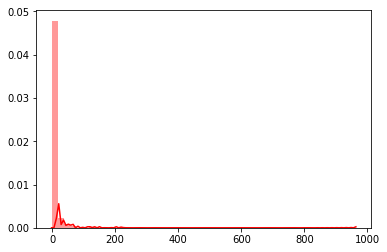

In [21]:
# Checking the Distribution of the Audit_risk as it is one of the target variable
audit_risk_value = audit_risk['Audit_Risk'].values
sns.distplot(audit_risk_value, color='r')

Finding Correlation between the variables of the dataset 

In [22]:
sp_corr = audit_risk.corr(method= 'spearman')
pearson_corr = audit_risk.corr(method= 'pearson')

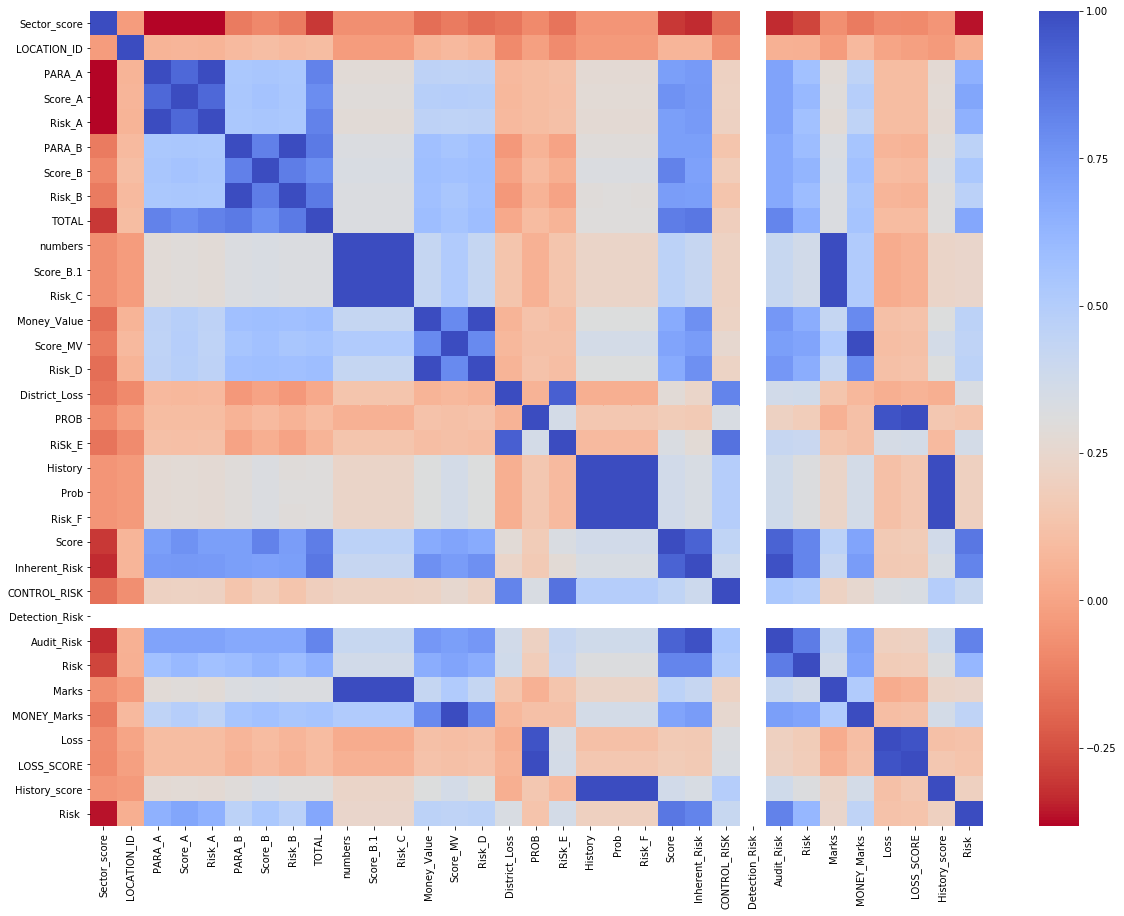

In [23]:
fig = plt.subplots(figsize = (20,15))
sns.heatmap(sp_corr, cmap='coolwarm_r', annot_kws={'size':20})

In [24]:
indices = np.where((pearson_corr >= 0.999) | (pearson_corr <= -0.999))
indices = [(pearson_corr.index[x], pearson_corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

In [25]:
indices

[('PARA_A', 'Risk_A'),
 ('PARA_B', 'Risk_B'),
 ('Score_B.1', 'Marks'),
 ('Money_Value', 'Risk_D'),
 ('Score_MV', 'MONEY_Marks'),
 ('PROB', 'LOSS_SCORE'),
 ('Prob', 'History_score')]

# Dropping highly correlated columns from the pairs 
col = ['PARA_A','PARA_B', 'Score_B.1','Score_MV','Money_Value','PROB','Prob']
audit_risk = audit_risk.drop(columns=col)

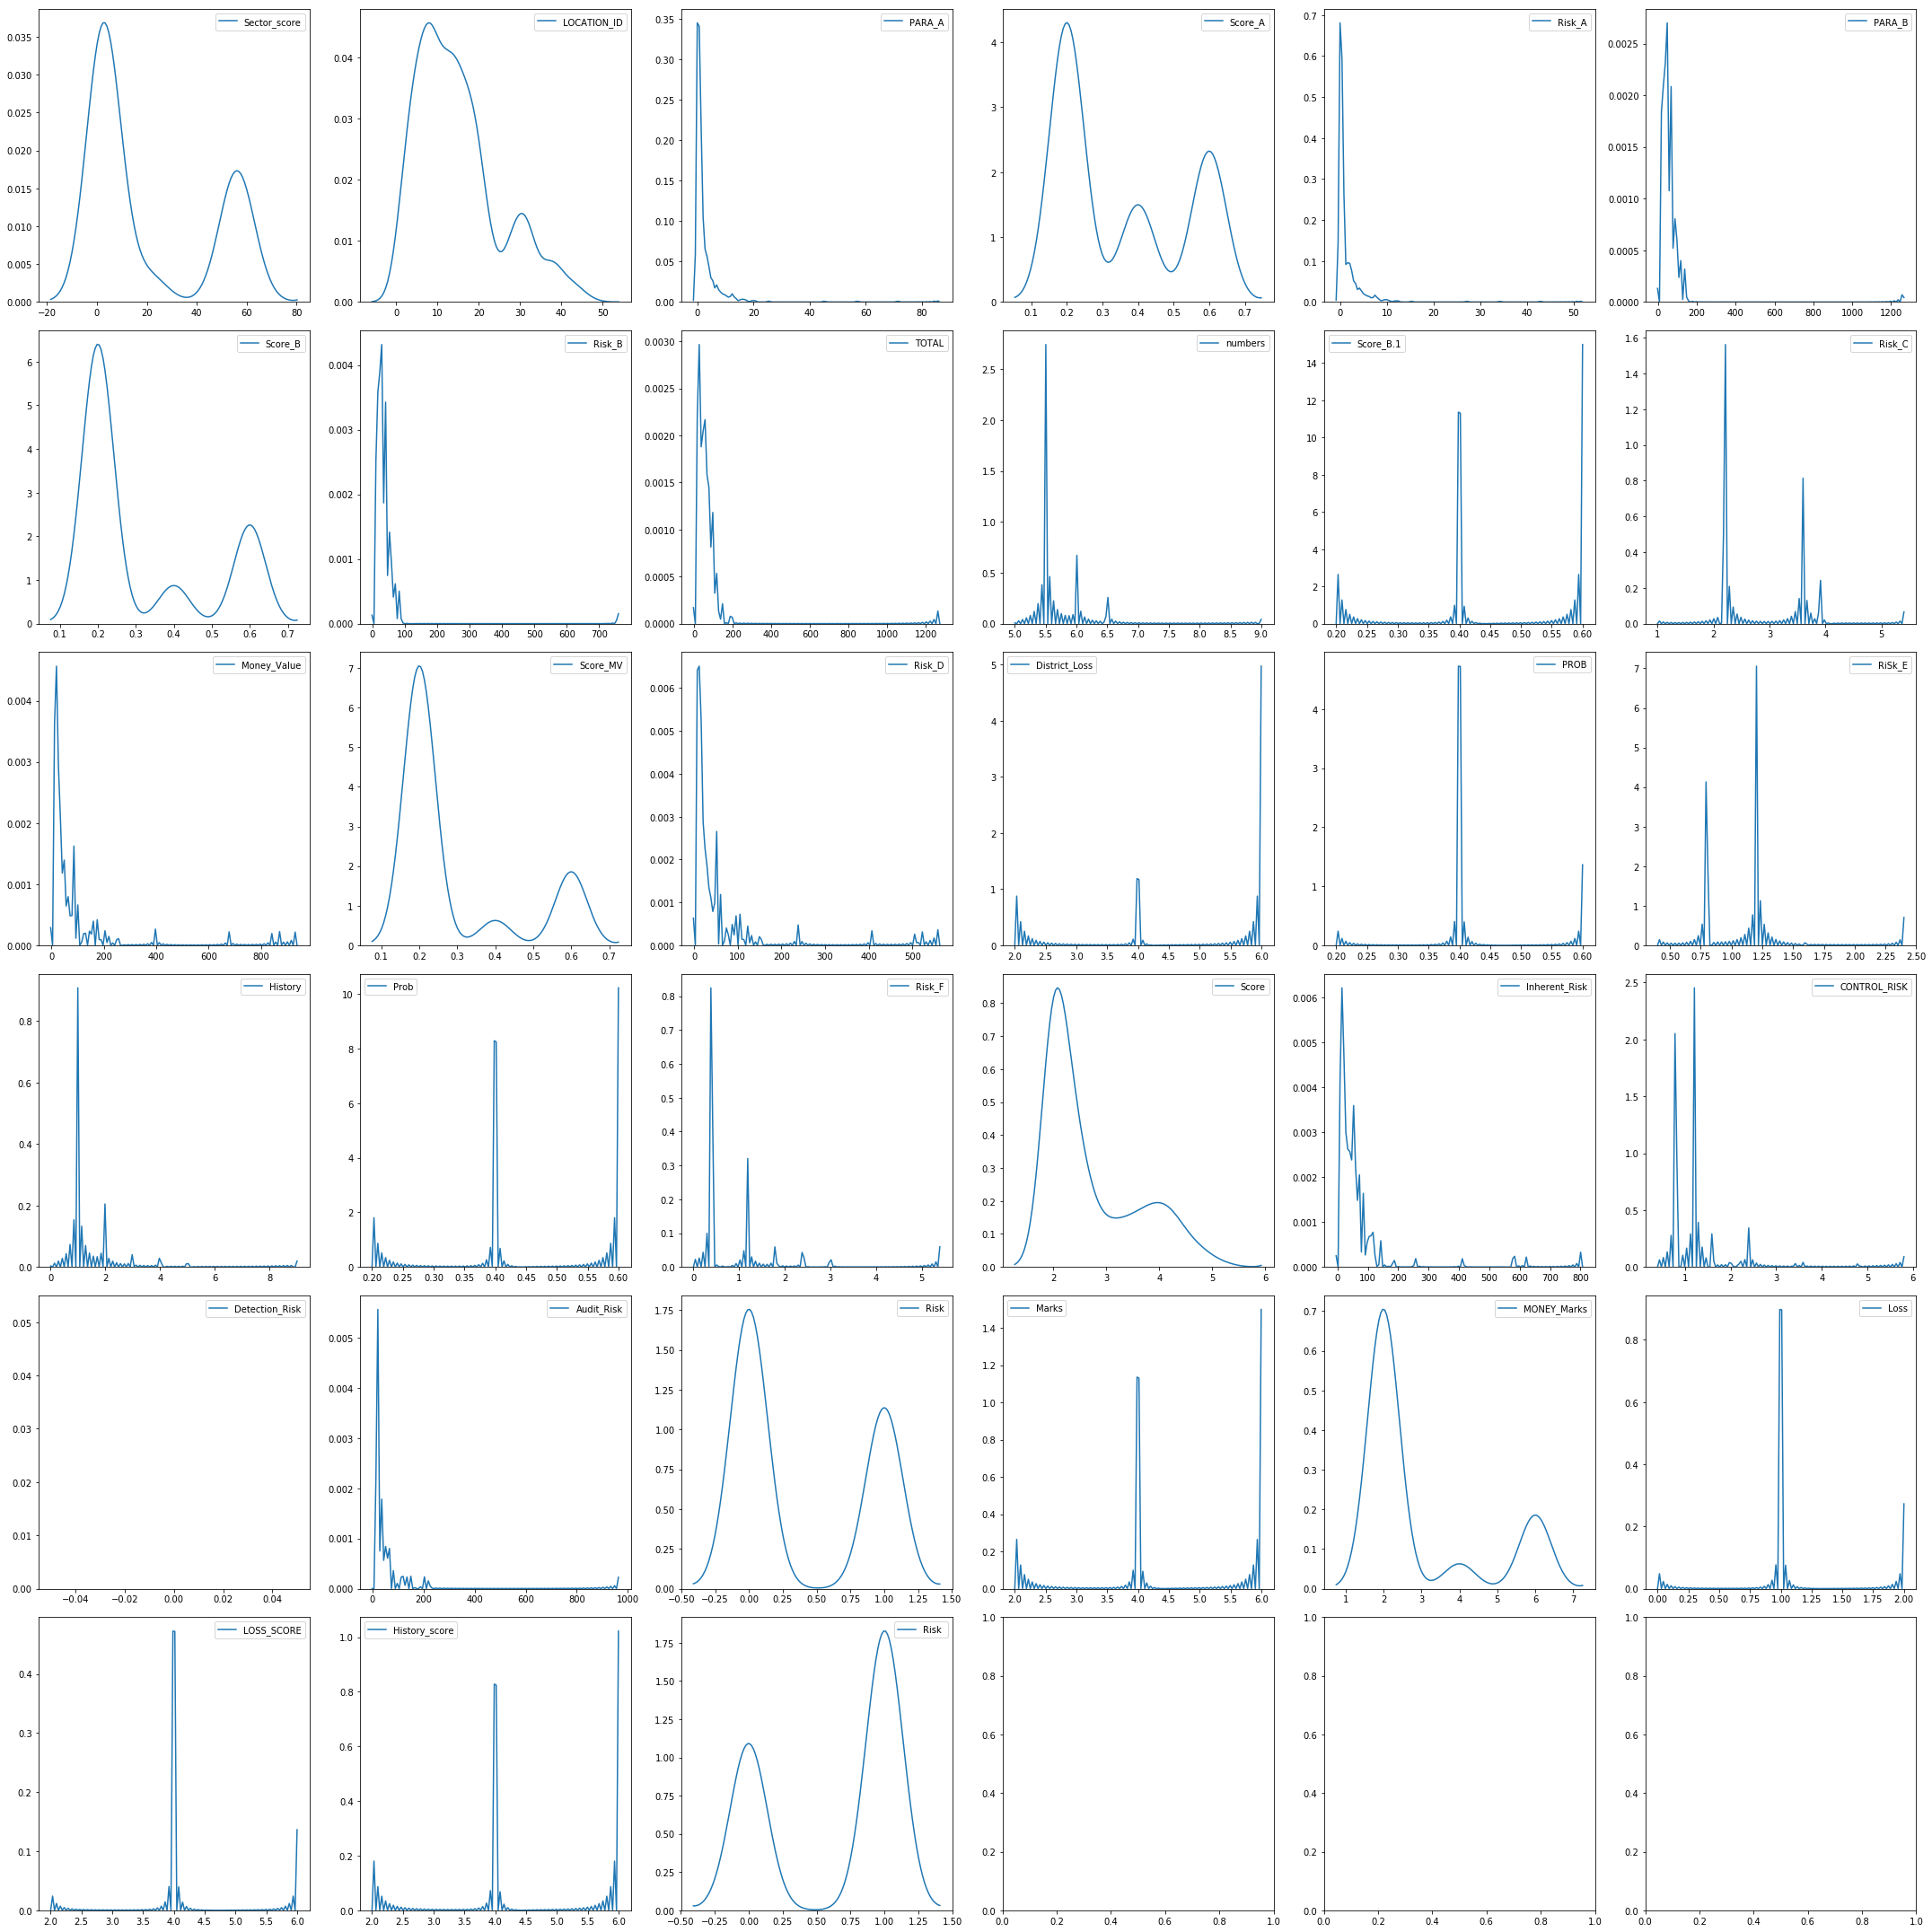

In [26]:
colnames = pd.Series(audit_risk.columns)
fig, axs = plt.subplots(6,6, figsize=(30, 30), facecolor='w', edgecolor='r')

axs = axs.ravel()

for i in colnames.index.values:
    
    sns.kdeplot(audit_risk[colnames[i]], ax=axs[i])
    fig.tight_layout()
plt.show()

### Feature Scaling
- Standard 
As we see most of the features are not skewed and displays bimodal tranfromation so the ``Standard scaling`` will be appropriate for this type of data 

In [27]:
y_cl = audit_risk['Risk']
X_cl = audit_risk.drop(['Audit_Risk','Risk'],axis=1)
X_train_org_cl, X_test_org_cl, y_ctrain, y_ctest = train_test_split(X_cl, y_cl, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train_org_cl)
X_ctrain = scaler.transform(X_train_org_cl)
X_ctest = scaler.transform(X_test_org_cl)
X_ctrain.shape

(582, 31)

### ClassificationTasks

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

### Voting Classifiers with Hard Voting

In [29]:
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(X_ctrain,y_ctrain)
logis_clf=LogisticRegression(C=100,penalty='l1')
logis_clf.fit(X_ctrain,y_ctrain)
svc_clf = SVC(kernel = 'rbf',C=100,gamma=0.1)
svc_clf.fit(X_ctrain,y_ctrain)
lsvc_clf = SVC(kernel = 'linear',C=100)
lsvc_clf.fit(X_ctrain,y_ctrain)
psvc_clf = SVC(kernel = 'poly', C=10, degree = 2)
psvc_clf.fit(X_ctrain,y_ctrain)
dt_clf=DecisionTreeClassifier(max_depth=5,criterion='gini')
dt_clf.fit(X_ctrain,y_ctrain)
voting_clf_hard = VotingClassifier(estimators=[('knn', knn_clf), ('logis', logis_clf), ('svc', svc_clf), ('lsvc', lsvc_clf), ('psvc', psvc_clf), ('dt', dt_clf)], voting='hard')
voting_clf_hard.fit(X_ctrain, y_ctrain)
from sklearn.metrics import f1_score 
for clf in (knn_clf, logis_clf, svc_clf, lsvc_clf, psvc_clf, dt_clf, voting_clf_hard):
    clf.fit(X_ctrain, y_ctrain)
    y_cpred = clf.predict(X_ctest)
    print(clf.__class__.__name__, f1_score(y_ctest, y_cpred))

KNeighborsClassifier 0.962962962962963
LogisticRegression 0.9928057553956835
SVC 0.9857142857142858
SVC 0.9928057553956835
SVC 0.9481481481481482
DecisionTreeClassifier 1.0
VotingClassifier 0.9928057553956835


### Voting Classifiers with Soft Voting

In [30]:
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(X_ctrain,y_ctrain)
logis_clf=LogisticRegression(C=100,penalty='l1')
logis_clf.fit(X_ctrain,y_ctrain)
svc_clf = SVC(C=100,gamma = 0.1, kernel ='rbf', probability = True)
svc_clf.fit(X_ctrain, y_ctrain)
lsvc_clf = SVC(C = 100, probability = True, kernel = 'linear')
lsvc_clf.fit(X_ctrain, y_ctrain)
psvc_clf = SVC(kernel = 'poly', C=10, degree = 2, probability = True)
psvc_clf.fit(X_ctrain,y_ctrain) 
dt_clf=DecisionTreeClassifier(max_depth=5,criterion='gini')
dt_clf.fit(X_ctrain,y_ctrain)
voting_clf_soft = VotingClassifier(estimators=[('knn', knn_clf), ('logis', logis_clf), ('svc', svc_clf), ('lsvc', lsvc_clf), ('psvc', psvc_clf), ('dt', dt_clf)], voting='soft')
voting_clf_soft.fit(X_ctrain, y_ctrain)

for clf in (knn_clf, logis_clf, svc_clf, lsvc_clf, psvc_clf, dt_clf, voting_clf_soft):
    clf.fit(X_ctrain, y_ctrain)
    y_cpred = clf.predict(X_ctest)
    print(clf.__class__.__name__, f1_score(y_ctest, y_cpred))

KNeighborsClassifier 0.962962962962963
LogisticRegression 0.9928057553956835
SVC 0.9857142857142858
SVC 0.9928057553956835
SVC 0.9481481481481482
DecisionTreeClassifier 1.0
VotingClassifier 0.9928057553956835


### Logistics Regression with bagging

In [31]:
from sklearn.ensemble import BaggingClassifier
logis_clf = LogisticRegression(C= 100, penalty='l1')
bag_clf_logis = BaggingClassifier(logis_clf, bootstrap=True, random_state=0)
param_grid = {'n_estimators': [10, 30, 50],
              'max_features': [5,7,9],
              'max_samples' : [10,30,50]}
CV_bag = GridSearchCV(estimator=bag_clf_logis, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_bag.fit(X_ctrain, y_ctrain)
y_cpred_logis = CV_bag.predict(X_ctest)
print({'f1-Score': f1_score(y_ctest, y_cpred_logis)})
print({'auc': roc_auc_score(y_ctest, y_cpred_logis)})

{'f1-Score': 0.9928057553956835}
{'auc': 0.9928571428571429}


### Decision Tree with bagging

In [32]:
dt_clf = DecisionTreeClassifier(max_depth= 5,criterion='gini')
bag_clf_dt = BaggingClassifier(dt_clf, bootstrap=True, random_state=0)
param_grid = {'n_estimators': [10, 30, 50],
              'max_features': [5,7,9],
              'max_samples' : [20,50,80]}
CV_bag = GridSearchCV(estimator=bag_clf_dt, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_bag.fit(X_ctrain, y_ctrain)
y_cpred_dt = CV_bag.predict(X_ctest)
print({'f1-Score': f1_score(y_ctest, y_cpred_dt)})
print({'auc': roc_auc_score(y_ctest, y_cpred_dt)})

{'f1-Score': 0.9928057553956835}
{'auc': 0.9928571428571429}


### Linear SVC with Pasting

In [33]:
lsvc_clf = SVC(C = 100, probability = True, kernel = 'linear')
past_clf_lsvc = BaggingClassifier(lsvc_clf, bootstrap=False, random_state=0)
param_grid = {'n_estimators': [10, 30, 50],
              'max_features': [5,7,9],
              'max_samples' : [10,30,50]}
CV_past = GridSearchCV(estimator=past_clf_lsvc, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_past.fit(X_ctrain, y_ctrain)
y_cpred_lsvc = CV_past.predict(X_ctest)
print({'f1-Score': f1_score(y_ctest, y_cpred_lsvc)})
print({'auc': roc_auc_score(y_ctest, y_cpred_lsvc)})

{'f1-Score': 0.8976377952755905}
{'auc': 0.9071428571428571}


### KNN with Pasting

In [34]:
knn_clf = KNeighborsClassifier(n_neighbors=15)
past_clf_knn = BaggingClassifier(knn_clf, n_estimators=500, max_samples=100, bootstrap=False, max_features=5, random_state=0)
param_grid = {'n_estimators': [10, 30, 50],
              'max_features': [5,7,9],
              'max_samples' : [15,30,50]}
CV_past = GridSearchCV(estimator=past_clf_knn, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_past.fit(X_ctrain, y_ctrain)
y_cpred_knn = CV_past.predict(X_ctest)
print({'f1-Score': f1_score(y_ctest, y_cpred_knn)})
print({'auc': roc_auc_score(y_ctest, y_cpred_knn)})

{'f1-Score': 0.782608695652174}
{'auc': 0.8214285714285714}


### Logistic Regression with Adaboost Boosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
adaboost_logis = AdaBoostClassifier(logis_clf,random_state=0,learning_rate=0.5)
param_grid = {'n_estimators': [10, 30, 50],}
CV_adaboost = GridSearchCV(estimator=adaboost_logis, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_adaboost.fit(X_ctrain, y_ctrain)

y_boost_logis = CV_adaboost.predict(X_ctest)

print({'f1-Score': f1_score(y_ctest, y_boost_logis)})
print({'auc': roc_auc_score(y_ctest, y_boost_logis)})

{'f1-Score': 0.9928057553956835}
{'auc': 0.9928571428571429}


### Decision Tree with Adaboost Boosting

In [37]:
adaboost_dt = AdaBoostClassifier(dt_clf, n_estimators=500,learning_rate = 0.5, random_state=0)
param_grid = {'n_estimators': [10, 30, 50],}
CV_adaboost = GridSearchCV(estimator=adaboost_dt, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_adaboost.fit(X_ctrain, y_ctrain)

y_boost_dt = CV_adaboost.predict(X_ctest)

print({'f1-Score': f1_score(y_ctest, y_boost_dt)})
print({'auc': roc_auc_score(y_ctest, y_boost_dt)})

{'f1-Score': 0.9928057553956835}
{'auc': 0.9928571428571429}


### Gradient Boosting

In [38]:
from  sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbrt = GradientBoostingClassifier(max_depth=5,learning_rate= 0.1,random_state=0,n_estimators=200)
gbrt.fit(X_ctrain, y_ctrain)

y_gbrt = gbrt.predict(X_ctest)

print({'f1-Score': f1_score(y_ctest, y_gbrt)})
print({'auc': roc_auc_score(y_ctest, y_gbrt)})

{'f1-Score': 0.9928057553956835}
{'auc': 0.9928571428571429}


### PCA

In [40]:
from sklearn.decomposition import PCA

In [41]:
cl_report = []

In [42]:
pca = PCA()
pca.fit(X_ctrain)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

11

In [43]:
pca = PCA(n_components = 11)
X_ctrain_reduced = pca.fit_transform(X_ctrain)
X_ctest_reduced = pca.transform(X_ctest)

### KNN

Parameter grid:
{'n_neighbors': [1, 3, 5, 10, 15, 20]}
Best parameters: {'n_neighbors': 15}
Training Score: 0.9621993127147767
Testing Score: 0.9690721649484536


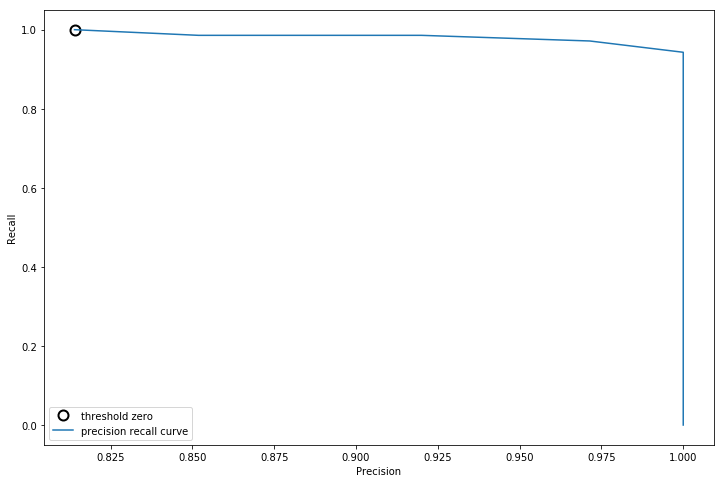

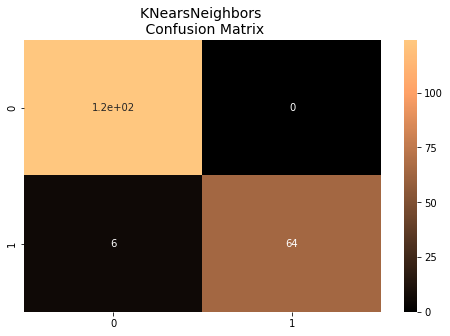

classification report               precision    recall  f1-score   support

           0       0.95      1.00      0.98       124
           1       1.00      0.91      0.96        70

   micro avg       0.97      0.97      0.97       194
   macro avg       0.98      0.96      0.97       194
weighted avg       0.97      0.97      0.97       194



In [44]:
knnClassifier = KNeighborsClassifier()
neighbors  = {'n_neighbors':[1,3,5,10,15,20]} 
print("Parameter grid:\n{}".format(neighbors))

knn_Grid = GridSearchCV(knnClassifier, param_grid=neighbors)
knn_Grid.fit(X_ctrain_reduced,y_ctrain)
print("Best parameters: {}".format(knn_Grid.best_params_))
print("Training Score: {}".format(knn_Grid.score(X_ctrain_reduced, y_ctrain)))
print("Testing Score: {}".format(knn_Grid.score(X_ctest_reduced, y_ctest)))

%matplotlib inline
y_knn_predict = knn_Grid.predict(X_ctest_reduced)
y_knn_train_predict = knn_Grid.predict(X_ctrain_reduced)
precision, recall, thresholds = precision_recall_curve(y_ctest,knn_Grid.predict_proba(X_ctest_reduced)[:, 1])

close_zero = np.argmin(np.abs(thresholds))
fig = plt.subplots(figsize = (12,8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()
#Confusion Matrix 
kneighbors_cf = confusion_matrix(y_ctest, knn_Grid.predict(X_ctest_reduced))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(kneighbors_cf,  annot=True, cmap=plt.cm.copper)
plt.title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
plt.show()

print ("classification report", classification_report(y_ctest, knn_Grid.predict(X_ctest_reduced)))

In [45]:
cl_report = [['KNN Clasifier ', 'k = 15', knn_Grid.score(X_ctrain_reduced, y_ctrain), knn_Grid.score(X_ctest_reduced, y_ctest), roc_auc_score(y_knn_train_predict, y_ctrain), roc_auc_score(y_knn_predict, y_ctest)]]

## Logistic Regression

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
Best parameters: {'C': 1000, 'penalty': 'l1'}
Training Score: 0.9914893617021276
Testing Score: 0.9928057553956835


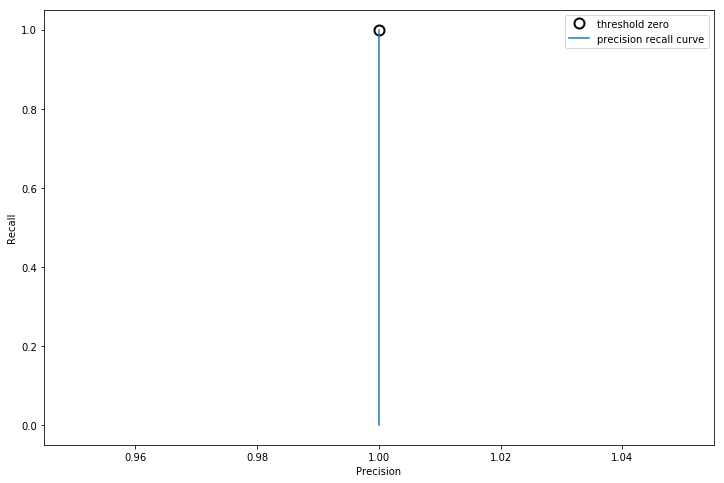

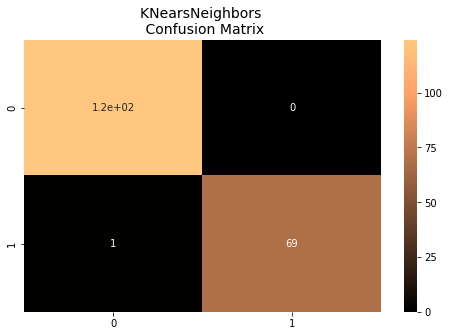

classification report               precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       1.00      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



In [46]:
logReg = LogisticRegression(random_state=0)
logisticParam  = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty' :['l1','l2']}
print("Parameter grid:\n{}".format(logisticParam))
logGrid = GridSearchCV(estimator = logReg, param_grid = logisticParam, cv=5, scoring= 'f1', return_train_score=True)

logGrid.fit(X_ctrain_reduced, y_ctrain)

print("Best parameters: {}".format(logGrid.best_params_))
print("Training Score: {}".format(logGrid.score(X_ctrain_reduced, y_ctrain)))
print("Testing Score: {}".format(logGrid.score(X_ctest_reduced, y_ctest)))

%matplotlib inline
y_log_predict = logGrid.predict(X_ctest_reduced)
y_log_train_predict = logGrid.predict(X_ctrain_reduced)
precision_log, recall_log, thresholds_log = precision_recall_curve(y_ctest,logGrid.decision_function(X_ctest_reduced))

close_zero = np.argmin(np.abs(thresholds_log))
fig = plt.subplots(figsize = (12,8))
plt.plot(precision_log[close_zero], recall_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_log, recall_log, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()
#Confusion Matrix 
logistic_cf = confusion_matrix(y_ctest, logGrid.predict(X_ctest_reduced))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(logistic_cf,  annot=True, cmap=plt.cm.copper)
plt.title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
plt.show()

print ("classification report", classification_report(y_ctest, logGrid.predict(X_ctest_reduced)))

In [47]:
cl_report = cl_report + [['Logistic Regression', logGrid.best_params_, logGrid.score(X_ctrain_reduced, y_ctrain), logGrid.score(X_ctest_reduced, y_ctest), roc_auc_score(y_log_train_predict, y_ctrain), roc_auc_score(y_log_predict, y_ctest)]]

## Linear SVM

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Best parameters: {'C': 1000}
Training Score: 0.9894291754756871
Testing Score: 0.9859154929577464


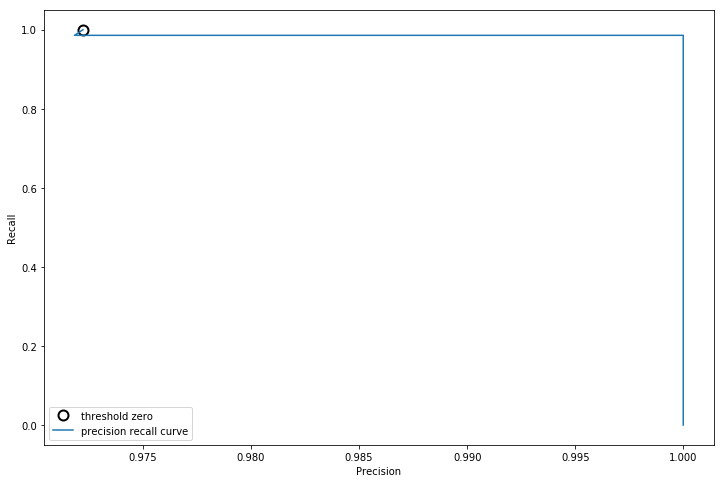

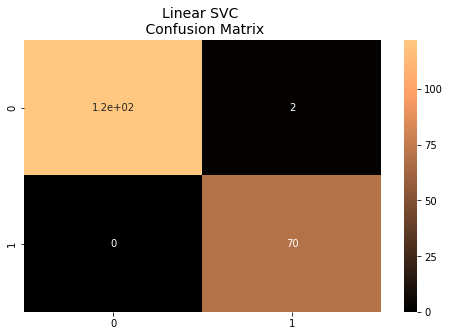

classification report               precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.97      1.00      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       0.99      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



In [48]:
linearSVC = LinearSVC(random_state=0)
linearsvc = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print("Parameter grid:\n{}".format(linearsvc))
linearSVCGrid = GridSearchCV(linearSVC, param_grid = linearsvc, cv=5, scoring='f1', return_train_score=True)

linearSVCGrid.fit(X_ctrain_reduced,y_ctrain)

print("Best parameters: {}".format(linearSVCGrid.best_params_))
print("Training Score: {}".format(linearSVCGrid.score(X_ctrain_reduced, y_ctrain)))
print("Testing Score: {}".format(linearSVCGrid.score(X_ctest_reduced, y_ctest)))

%matplotlib inline
y_lsvc_predict = linearSVCGrid.predict(X_ctest_reduced)
y_lsvc_train_predict = linearSVCGrid.predict(X_ctrain_reduced)
precision_lsvc, recall_lsvc, thresholds_lsvc = precision_recall_curve(y_ctest,linearSVCGrid.decision_function(X_ctest_reduced))

close_zero = np.argmin(np.abs(thresholds_lsvc))
fig = plt.subplots(figsize = (12,8))
plt.plot(precision_lsvc[close_zero], recall_lsvc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_lsvc, recall_lsvc, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()
#Confusion Matrix 
lsvc_cf = confusion_matrix(y_ctest, linearSVCGrid.predict(X_ctest_reduced))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(lsvc_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Linear SVC \n Confusion Matrix", fontsize=14)
plt.show()

print ("classification report", classification_report(y_ctest, linearSVCGrid.predict(X_ctest_reduced)))

In [49]:
cl_report = cl_report + [['Linear SVM', linearSVCGrid.best_params_, linearSVCGrid.score(X_ctrain_reduced, y_ctrain), linearSVCGrid.score(X_ctest_reduced, y_ctest), roc_auc_score(y_log_train_predict, y_ctrain), roc_auc_score(y_log_predict, y_ctest)]]

## SVM Radial Kernel

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.01}
Training Score: 0.9829787234042553
Testing Score: 0.9855072463768115
Train roc_auc_score: 0.99
Test roc_auc_score: 0.99 


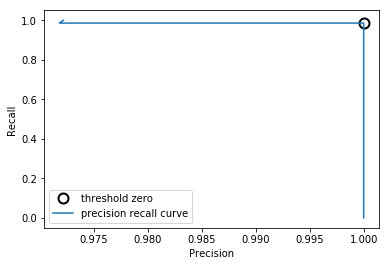

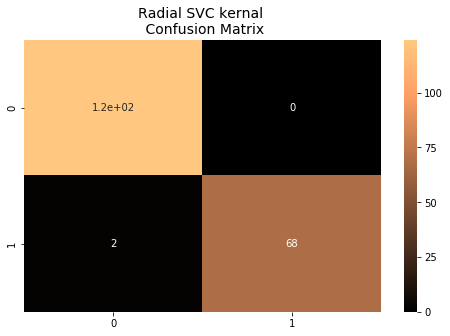

classification report               precision    recall  f1-score   support

           0       0.98      1.00      0.99       124
           1       1.00      0.97      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       0.99      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



In [50]:
radialSVC = SVC(kernel = 'rbf',random_state=0)
radialSVCParam = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(radialSVCParam))
radialSVCGrid = GridSearchCV(radialSVC, param_grid = radialSVCParam, cv=5,scoring='f1', return_train_score=True)
radialSVCGrid.fit(X_ctrain_reduced, y_ctrain)

print("Best parameters: {}".format(radialSVCGrid.best_params_))
print("Training Score: {}".format(radialSVCGrid.score(X_ctrain_reduced, y_ctrain)))
print("Testing Score: {}".format(radialSVCGrid.score(X_ctest_reduced, y_ctest)))

y_radsvc_predict = radialSVCGrid.predict(X_ctest_reduced)
y_radsvc_train_predict = radialSVCGrid.predict(X_ctrain_reduced)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_radsvc_train_predict, y_ctrain))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_radsvc_predict, y_ctest))

precision_rdS, recall_rdS, thresholds_rdS = precision_recall_curve(y_ctest, radialSVCGrid.decision_function(X_ctest_reduced))
close_zero = np.argmin(np.abs(thresholds_rdS))
plt.plot(precision_rdS[close_zero], recall_rdS[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision_rdS, recall_rdS, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

#Confusion Matrix 
radialSCV_cf = confusion_matrix(y_ctest, radialSVCGrid.predict(X_ctest_reduced))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(radialSCV_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Radial SVC kernal \n Confusion Matrix", fontsize=14)
plt.show()

print ("classification report", classification_report(y_ctest, radialSVCGrid.predict(X_ctest_reduced)))

In [51]:
cl_report = cl_report + [['Radial SVC ', radialSVCGrid.best_params_, radialSVCGrid.score(X_ctrain_reduced, y_ctrain), radialSVCGrid.score(X_ctest_reduced, y_ctest), roc_auc_score(y_radsvc_train_predict, y_ctrain), roc_auc_score(y_radsvc_predict, y_ctest)]]

## Polynomial SVC 

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 1}
Training Score: 0.9511111111111111
Testing Score: 0.9481481481481482


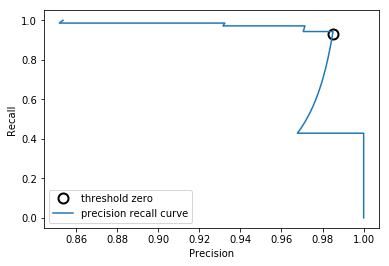

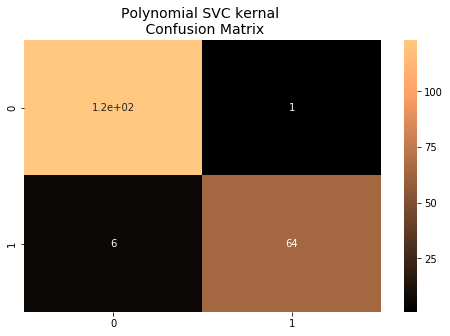

classification report               precision    recall  f1-score   support

           0       0.95      0.99      0.97       124
           1       0.98      0.91      0.95        70

   micro avg       0.96      0.96      0.96       194
   macro avg       0.97      0.95      0.96       194
weighted avg       0.96      0.96      0.96       194



In [52]:
polySVC = SVC(kernel = 'poly', degree = 2,random_state=0)
polySVCparam = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(polySVCparam))
polySVCGrid = GridSearchCV(polySVC, param_grid = polySVCparam, scoring='f1', cv=5, return_train_score=True)

polySVCGrid.fit(X_ctrain_reduced, y_ctrain)

print("Best parameters: {}".format(polySVCGrid.best_params_))
print("Training Score: {}".format(polySVCGrid.score(X_ctrain_reduced, y_ctrain)))
print("Testing Score: {}".format(polySVCGrid.score(X_ctest_reduced, y_ctest)))

y_polySVC_predict = polySVCGrid.predict(X_ctest_reduced)
y_polySVC_train_predict = polySVCGrid.predict(X_ctrain_reduced)


precision_poly, recall_poly, thresholds_poly = precision_recall_curve(y_ctest, polySVCGrid.decision_function(X_ctest_reduced))
close_zero = np.argmin(np.abs(thresholds_poly))
plt.plot(precision_poly[close_zero], recall_poly[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision_poly, recall_poly, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

polySVC_cf = confusion_matrix(y_ctest, polySVCGrid.predict(X_ctest_reduced))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(polySVC_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Polynomial SVC kernal \n Confusion Matrix", fontsize=14)
plt.show()

print ("classification report", classification_report(y_ctest, polySVCGrid.predict(X_ctest_reduced)))

In [53]:
cl_report = cl_report + [['Polynomial SVC ', polySVCGrid.best_params_, polySVCGrid.score(X_ctrain_reduced, y_ctrain), polySVCGrid.score(X_ctest_reduced, y_ctest), roc_auc_score(y_polySVC_train_predict, y_ctrain), roc_auc_score(y_polySVC_predict, y_ctest)]]

## Decision Tree 

Parameter grid:
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']}
Best parameters: {'criterion': 'entropy', 'max_depth': 6}
Training Score: 0.9893842887473461
Testing Score: 0.9787234042553192


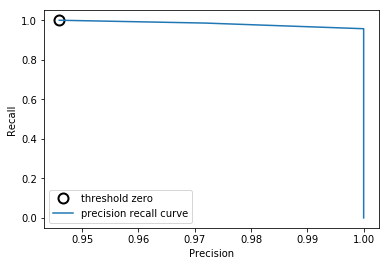

In [54]:
decisionTree  = DecisionTreeClassifier(random_state=0)
dtreeparam = {'max_depth': [1,2,3,4,5,6,7,8, 9, 10], 'criterion': ['gini','entropy']}
print("Parameter grid:\n{}".format(dtreeparam))
decisionTreeGrid = GridSearchCV(decisionTree, param_grid = dtreeparam, cv=5,scoring='f1',return_train_score=True)

decisionTreeGrid.fit(X_ctrain_reduced, y_ctrain)

print("Best parameters: {}".format(decisionTreeGrid.best_params_))
print("Training Score: {}".format(decisionTreeGrid.score(X_ctrain_reduced, y_ctrain)))
print("Testing Score: {}".format(decisionTreeGrid.score(X_ctest_reduced, y_ctest)))


y_dtree_predict = decisionTreeGrid.predict(X_ctest_reduced)
y_dtree_train_predict = decisionTreeGrid.predict(X_ctrain_reduced)

precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_ctest, decisionTreeGrid.predict_proba(X_ctest_reduced)[:,1])
close_zero = np.argmin(np.abs(thresholds_tree))
plt.plot(precision_tree[close_zero], recall_tree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision_tree, recall_tree, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

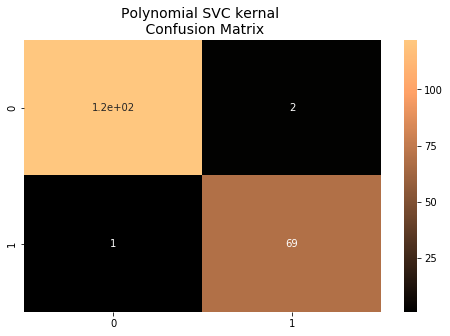

classification report               precision    recall  f1-score   support

           0       0.99      0.98      0.99       124
           1       0.97      0.99      0.98        70

   micro avg       0.98      0.98      0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



In [55]:
dtree_cf = confusion_matrix(y_ctest, decisionTreeGrid.predict(X_ctest_reduced))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(dtree_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Polynomial SVC kernal \n Confusion Matrix", fontsize=14)
plt.show()
print ("classification report", classification_report(y_ctest, decisionTreeGrid.predict(X_ctest_reduced)))

In [56]:
cl_report = cl_report + [['Decision Tree', decisionTreeGrid.best_params_, decisionTreeGrid.score(X_ctrain_reduced, y_ctrain), decisionTreeGrid.score(X_ctest_reduced, y_ctest), roc_auc_score(y_dtree_train_predict, y_ctrain), roc_auc_score(y_dtree_predict, y_ctest)]]

In [57]:
classificationReport = pd.DataFrame(cl_report, columns=['Model', 'Best Params', 'F1-Train', 'F1-Test', 'AUC-Train', 'AUC-Test'])

In [58]:
classificationReport

,Model,Best Params,F1-Train,F1-Test,AUC-Train,AUC-Test
0,KNN Clasifier,k = 15,0.962199,0.969072,0.966980,0.976923
1,Logistic Regression,"{'C': 1000, 'penalty': 'l1'}",0.991489,0.992806,0.992863,0.996000
2,Linear SVM,{'C': 1000},0.989429,0.985915,0.992863,0.996000
3,Radial SVC,"{'C': 100, 'gamma': 0.01}",0.982979,0.985507,0.985726,0.992063
4,Polynomial SVC,{'C': 1},0.951111,0.948148,0.969064,0.969052
5,Decision Tree,"{'criterion': 'entropy', 'max_depth': 6}",0.989384,0.978723,0.990754,0.981850


In [59]:
## Reding results from Project 1 
oldresults = pd.read_csv('ClassificationResults.csv')
oldresults

,Model,Best Params,F1-Train,F1-Test,AUC-Train,AUC-Test
0,KNN Clasifier,k = 15,0.965636,0.974227,0.969667,0.980620
1,Logistic Regression,"{'C': 100, 'penalty': 'l1'}",0.993603,0.992806,0.994990,0.996000
2,Logistic Regression,"{'C': 100, 'penalty': 'l1'}",0.993603,0.992806,0.994990,0.996000
3,Linear SVM,{'C': 100},1.000000,0.992806,0.994990,0.996000
4,Radial SVC,"{'C': 100, 'gamma': 0.1}",1.000000,0.985714,1.000000,0.988825
5,Polynomial SVC,{'C': 10},0.958242,0.948148,0.971974,0.969052
6,Decision Tree,"{'criterion': 'gini', 'max_depth': 5}",1.000000,1.000000,1.000000,1.000000


As we can see from the two reports, for almost every model the F-1 score and the AUC score is reduced when applied on the PCA transformed data. This can be attributed to the fact that, we have taken only 11 principal componets. So resulting variance loss is causing the models to have a lesser F-1 score and AUC score.

### Sequentional Model Using Kera

In [60]:
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [61]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=31,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# Fit the model
model.fit(X_ctrain, y_ctrain, epochs=500, batch_size=150)

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
582/582 [==============================] - 0s 583us/sample - loss: 0.6959 - acc: 0.5893
Epoch 2/500
582/582 [==============================] - 0s 17us/sample - loss: 0.5646 - acc: 0.9038
Epoch 3/500
582/582 [==============================] - 0s 19us/sample - loss: 0.4622 - acc: 0.9536
Epoch 4/500
582/582 [==============================] - 0s 22us/sample - loss: 0.3758 - acc: 0.9622
Epoch 5/500
582/582 [==============================] - 0s 21us/sample - loss: 0.2986 - acc: 0.9570
Epoch 6/500
582/582 [==============================] - 0s 17us/sample - loss: 0.2328 - acc: 0.9656
Epoch 7/500
582/582 [==============================] - 0s 21us/sample - loss: 0.1808 - acc: 0.9674
Epoch 8/500
582/582 [==============================] - 0s 21us/sample - loss: 0.1421 - acc: 0.9674
Epoch 9/500
582/582 [==============================] - 0s 22us/sample - loss: 0.1154 - acc: 0.9674
Epoch 10/500
582/582 [==============================] - 0s 2

582/582 [==============================] - 0s 21us/sample - loss: 0.0063 - acc: 1.0000
Epoch 81/500
582/582 [==============================] - 0s 17us/sample - loss: 0.0058 - acc: 1.0000
Epoch 82/500
582/582 [==============================] - 0s 19us/sample - loss: 0.0059 - acc: 1.0000
Epoch 83/500
582/582 [==============================] - 0s 19us/sample - loss: 0.0055 - acc: 1.0000
Epoch 84/500
582/582 [==============================] - 0s 19us/sample - loss: 0.0052 - acc: 1.0000
Epoch 85/500
582/582 [==============================] - 0s 19us/sample - loss: 0.0051 - acc: 1.0000
Epoch 86/500
582/582 [==============================] - 0s 19us/sample - loss: 0.0049 - acc: 1.0000
Epoch 87/500
582/582 [==============================] - 0s 21us/sample - loss: 0.0050 - acc: 1.0000
Epoch 88/500
582/582 [==============================] - 0s 22us/sample - loss: 0.0044 - acc: 1.0000
Epoch 89/500
582/582 [==============================] - 0s 24us/sample - loss: 0.0044 - acc: 1.0000
Epoch 90/500


582/582 [==============================] - 0s 17us/sample - loss: 7.4679e-04 - acc: 1.0000
Epoch 161/500
582/582 [==============================] - 0s 22us/sample - loss: 7.1343e-04 - acc: 1.0000
Epoch 162/500
582/582 [==============================] - 0s 19us/sample - loss: 7.0133e-04 - acc: 1.0000
Epoch 163/500
582/582 [==============================] - 0s 21us/sample - loss: 6.7938e-04 - acc: 1.0000
Epoch 164/500
582/582 [==============================] - 0s 19us/sample - loss: 6.7322e-04 - acc: 1.0000
Epoch 165/500
582/582 [==============================] - 0s 19us/sample - loss: 6.5835e-04 - acc: 1.0000
Epoch 166/500
582/582 [==============================] - 0s 19us/sample - loss: 6.5113e-04 - acc: 1.0000
Epoch 167/500
582/582 [==============================] - 0s 19us/sample - loss: 6.5964e-04 - acc: 1.0000
Epoch 168/500
582/582 [==============================] - 0s 22us/sample - loss: 6.4467e-04 - acc: 1.0000
Epoch 169/500
582/582 [==============================] - 0s 22us/samp

582/582 [==============================] - 0s 27us/sample - loss: 2.3226e-04 - acc: 1.0000
Epoch 239/500
582/582 [==============================] - 0s 24us/sample - loss: 2.3257e-04 - acc: 1.0000
Epoch 240/500
582/582 [==============================] - 0s 26us/sample - loss: 2.2760e-04 - acc: 1.0000
Epoch 241/500
582/582 [==============================] - 0s 24us/sample - loss: 2.2833e-04 - acc: 1.0000
Epoch 242/500
582/582 [==============================] - 0s 19us/sample - loss: 2.2325e-04 - acc: 1.0000
Epoch 243/500
582/582 [==============================] - 0s 21us/sample - loss: 2.2049e-04 - acc: 1.0000
Epoch 244/500
582/582 [==============================] - 0s 21us/sample - loss: 2.1687e-04 - acc: 1.0000
Epoch 245/500
582/582 [==============================] - 0s 17us/sample - loss: 2.1487e-04 - acc: 1.0000
Epoch 246/500
582/582 [==============================] - 0s 21us/sample - loss: 2.1237e-04 - acc: 1.0000
Epoch 247/500
582/582 [==============================] - ETA: 0s - lo

582/582 [==============================] - 0s 21us/sample - loss: 1.1041e-04 - acc: 1.0000
Epoch 316/500
582/582 [==============================] - 0s 21us/sample - loss: 1.0833e-04 - acc: 1.0000
Epoch 317/500
582/582 [==============================] - 0s 19us/sample - loss: 1.1066e-04 - acc: 1.0000
Epoch 318/500
582/582 [==============================] - 0s 17us/sample - loss: 1.0664e-04 - acc: 1.0000
Epoch 319/500
582/582 [==============================] - 0s 21us/sample - loss: 1.0573e-04 - acc: 1.0000
Epoch 320/500
582/582 [==============================] - 0s 19us/sample - loss: 1.0512e-04 - acc: 1.0000
Epoch 321/500
582/582 [==============================] - 0s 19us/sample - loss: 1.0393e-04 - acc: 1.0000
Epoch 322/500
582/582 [==============================] - 0s 21us/sample - loss: 1.0250e-04 - acc: 1.0000
Epoch 323/500
582/582 [==============================] - 0s 17us/sample - loss: 1.0150e-04 - acc: 1.0000
Epoch 324/500
582/582 [==============================] - 0s 19us/samp

582/582 [==============================] - 0s 21us/sample - loss: 6.0712e-05 - acc: 1.0000
Epoch 394/500
582/582 [==============================] - 0s 19us/sample - loss: 6.1296e-05 - acc: 1.0000
Epoch 395/500
582/582 [==============================] - 0s 19us/sample - loss: 6.0160e-05 - acc: 1.0000
Epoch 396/500
582/582 [==============================] - 0s 17us/sample - loss: 5.9678e-05 - acc: 1.0000
Epoch 397/500
582/582 [==============================] - 0s 19us/sample - loss: 6.0060e-05 - acc: 1.0000
Epoch 398/500
582/582 [==============================] - 0s 17us/sample - loss: 5.8689e-05 - acc: 1.0000
Epoch 399/500
582/582 [==============================] - 0s 24us/sample - loss: 5.8577e-05 - acc: 1.0000
Epoch 400/500
582/582 [==============================] - 0s 21us/sample - loss: 5.8561e-05 - acc: 1.0000
Epoch 401/500
582/582 [==============================] - 0s 21us/sample - loss: 5.8771e-05 - acc: 1.0000
Epoch 402/500
582/582 [==============================] - 0s 19us/samp

582/582 [==============================] - 0s 17us/sample - loss: 3.7954e-05 - acc: 1.0000
Epoch 472/500
582/582 [==============================] - 0s 19us/sample - loss: 3.8412e-05 - acc: 1.0000
Epoch 473/500
582/582 [==============================] - 0s 17us/sample - loss: 3.7913e-05 - acc: 1.0000
Epoch 474/500
582/582 [==============================] - 0s 19us/sample - loss: 3.7604e-05 - acc: 1.0000
Epoch 475/500
582/582 [==============================] - 0s 21us/sample - loss: 3.7841e-05 - acc: 1.0000
Epoch 476/500
582/582 [==============================] - 0s 22us/sample - loss: 3.7251e-05 - acc: 1.0000
Epoch 477/500
582/582 [==============================] - 0s 22us/sample - loss: 3.7229e-05 - acc: 1.0000
Epoch 478/500
582/582 [==============================] - 0s 22us/sample - loss: 3.6844e-05 - acc: 1.0000
Epoch 479/500
582/582 [==============================] - 0s 24us/sample - loss: 3.7117e-05 - acc: 1.0000
Epoch 480/500
582/582 [==============================] - 0s 22us/samp

In [64]:
# evaluate the model
from  sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
scores = model.evaluate(X_ctest, y_ctest)

194/194 [==============================] - 0s 478us/sample - loss: 0.0551 - acc: 0.9897


In [65]:
y_predict_N = model.predict_classes(X_ctest)
print({'f1-Score': f1_score(y_ctest, y_predict_N)})
print({'auc': roc_auc_score(y_ctest, y_predict_N)})

{'f1-Score': 0.9857142857142858}
{'auc': 0.9888248847926268}
